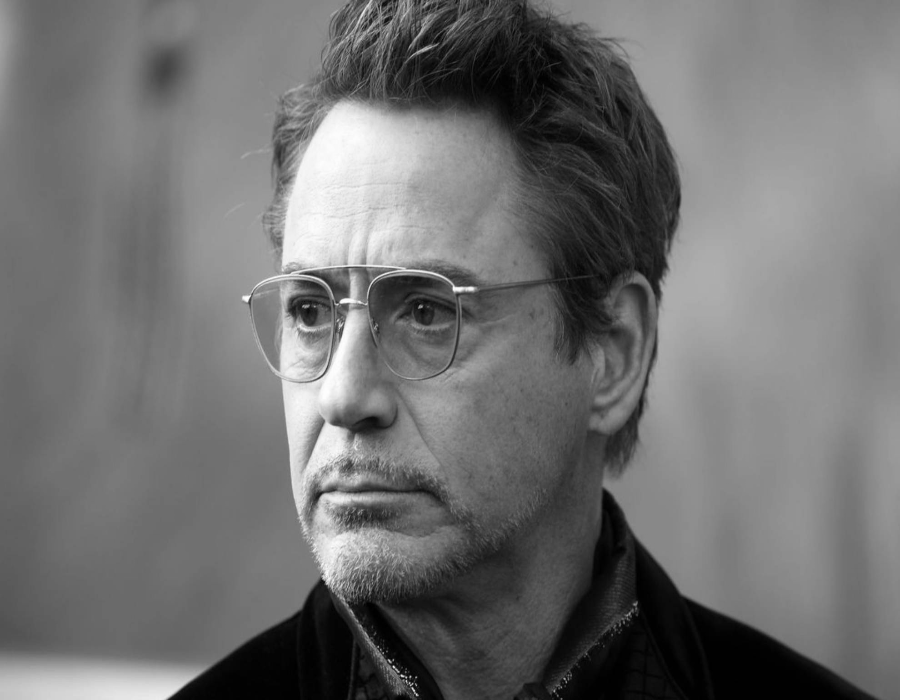

In [6]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

# blank = np.zeros((400, 400), dtype='uint8')
img = cv2.imread("rdj2.jpg")
resized_img=cv2.resize(img, (900,700))

gray = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

### Grayscale Histogram

In [7]:
import matplotlib.pyplot as plt

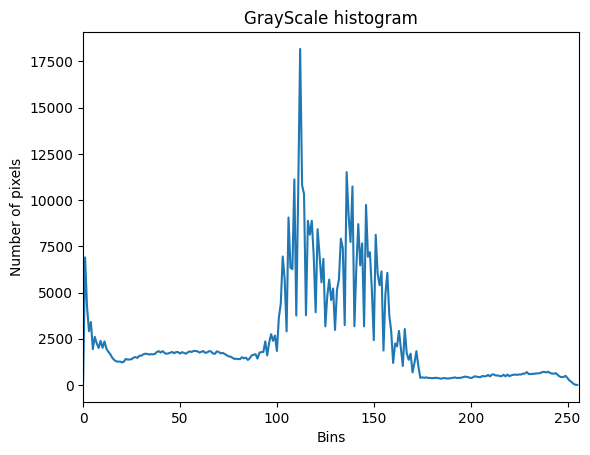

In [13]:
gray_hist=cv2.calcHist([gray], [0], None,[256], [0, 256] )
# mask is set to none
plt.figure()
plt.title("GrayScale histogram")
plt.xlabel('Bins')
plt.ylabel('Number of pixels')
plt.plot(gray_hist)

plt.xlim([0, 256])
plt.show()

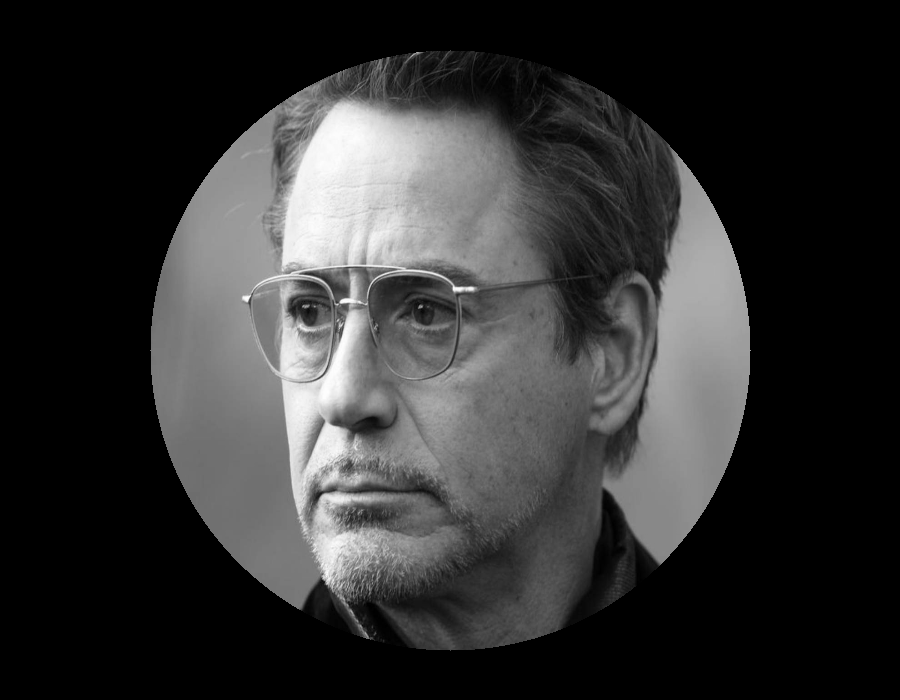

In [15]:
blank = np.zeros(resized_img.shape[:2], dtype='uint8')
circle = cv2.circle(blank, (resized_img.shape[1]//2, resized_img.shape[0]//2), 300, 255,  -1)
mask=cv2.bitwise_and(gray, gray, mask=circle)
cv2_imshow(mask)

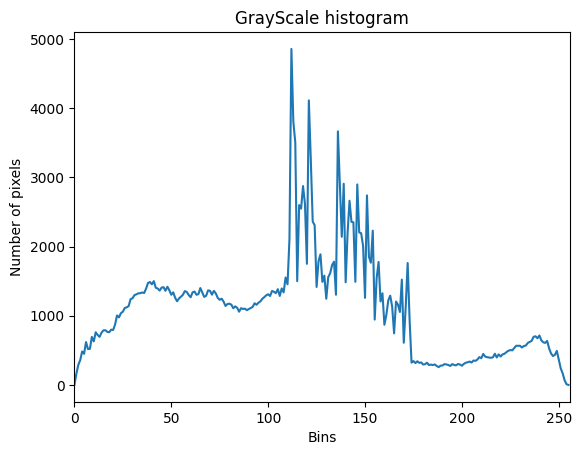

In [16]:
gray_hist=cv2.calcHist([gray], [0], mask,[256], [0, 256] )
# mask is set to none
plt.figure()
plt.title("GrayScale histogram")
plt.xlabel('Bins')
plt.ylabel('Number of pixels')
plt.plot(gray_hist)

plt.xlim([0, 256])
plt.show()

### Color Histogram

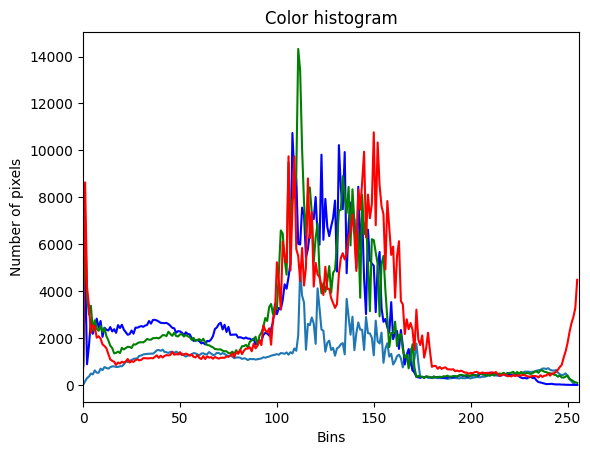

In [21]:
plt.figure()
plt.title("Color histogram")
plt.xlabel('Bins')
plt.ylabel('Number of pixels')
plt.plot(gray_hist)

colors = ('b', 'g', 'r')
for i, col in enumerate(colors):
  hist = cv2.calcHist([resized_img], [i], None, [256], [0, 256])
  plt.plot(hist, color=col)
  plt.xlim([0, 256])

plt.show()

## Thresholding

##### converting an image to binary image, pixels are either 0(black) or 255(white)

### simple thresholding

Simple Threshold


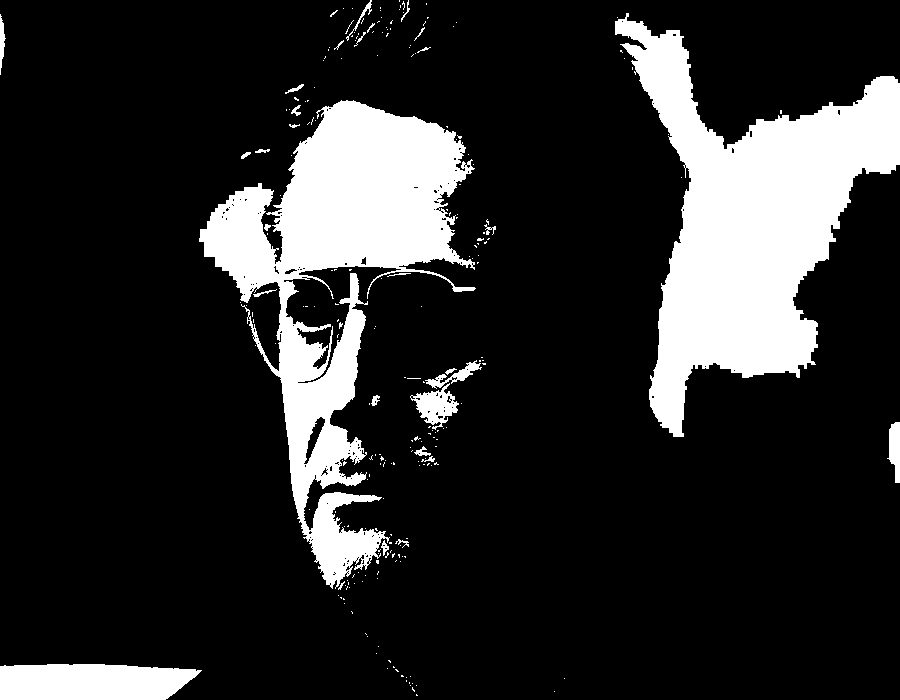

-1

In [28]:
threshold, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)
print("Simple Threshold")
cv2_imshow(thresh )
cv2.waitKey(0)

Simple Threshold inverse


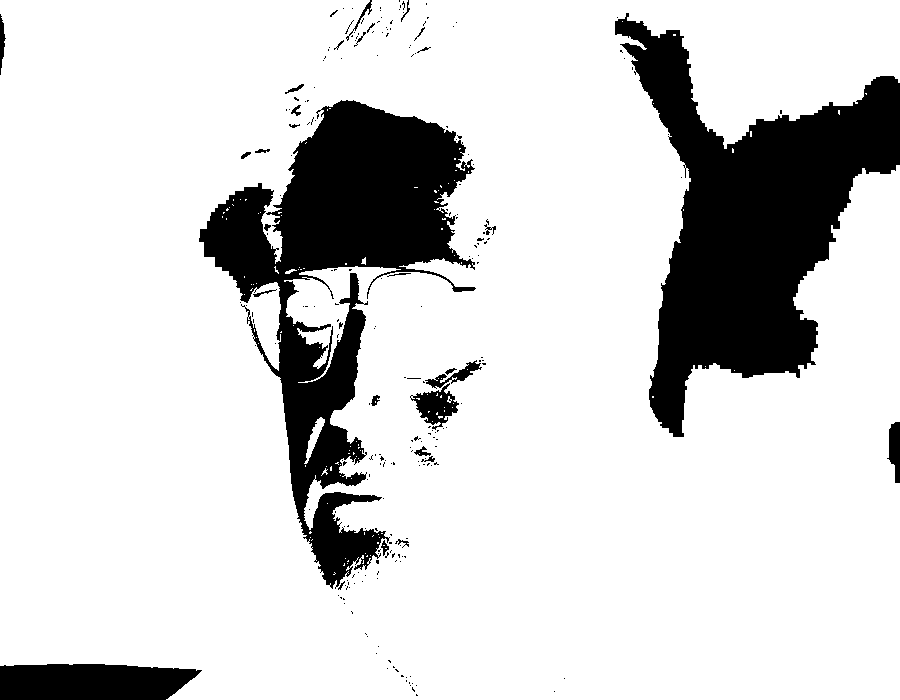

-1

In [30]:
threshold, thresh_inv = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)
print("Simple Threshold inverse")
cv2_imshow(thresh_inv )
cv2.waitKey(0)

### adaptive thresholding

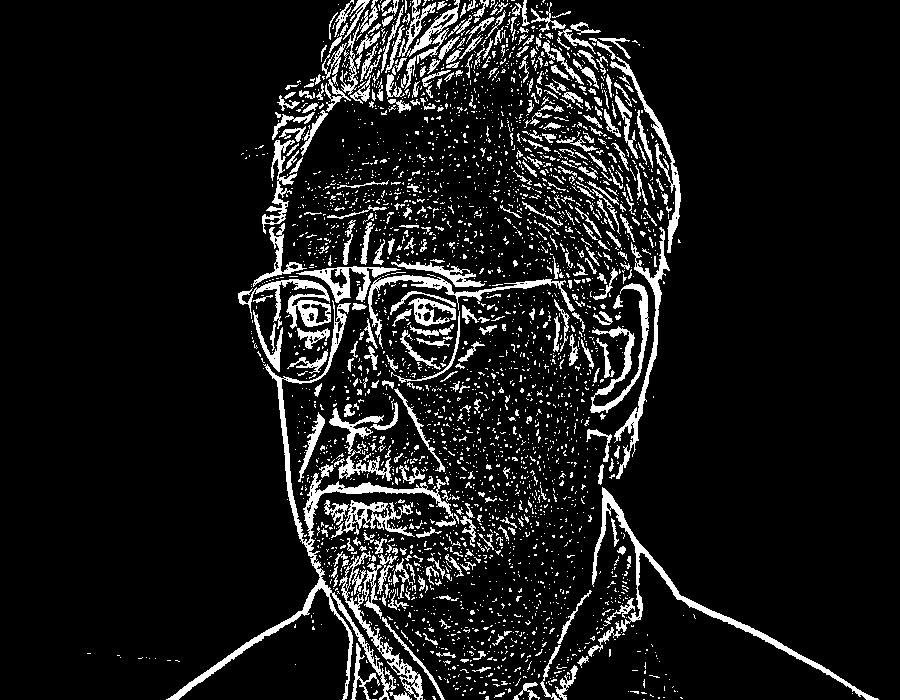

-1

In [35]:
adaptive_thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 5)
cv2_imshow(adaptive_thresh)
cv2.waitKey(0)

# *Edge detection*

In [49]:
# two methods to detect the edge laplacian and sobel

### Laplacian

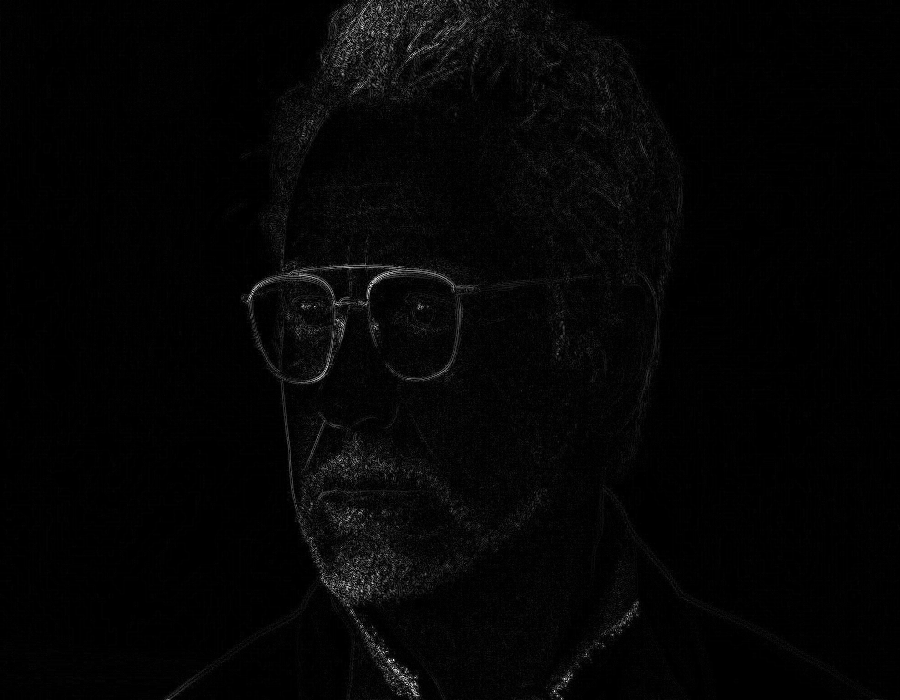

In [38]:
lap = cv2.Laplacian(gray, cv2.CV_64F)
lap = np.uint8(np.absolute(lap))
cv2_imshow(lap)

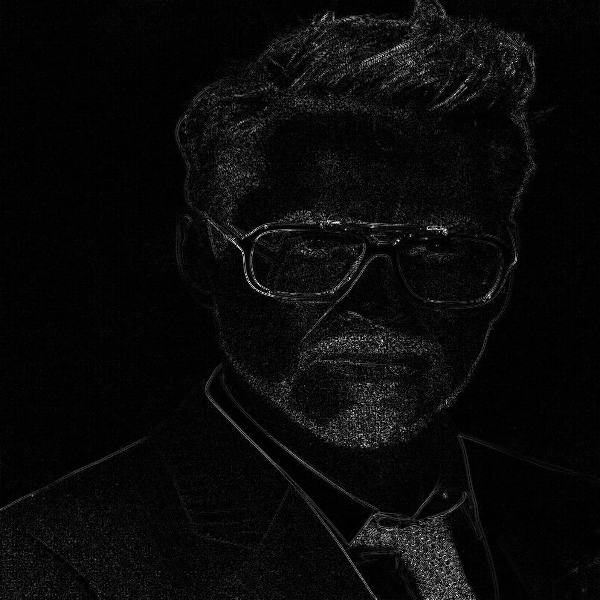

In [48]:
# with image 2
img2 = cv2.imread("rdj5.jpg")
resized_img2=cv2.resize(img2, (600,600))

gray2 = cv2.cvtColor(resized_img2, cv2.COLOR_BGR2GRAY)
# cv2_imshow(gray2)
lap2 = cv2.Laplacian(gray2, cv2.CV_64F)
lap2 = np.uint8(np.absolute(lap2))
cv2_imshow(lap2)

### Sobel

sobel x


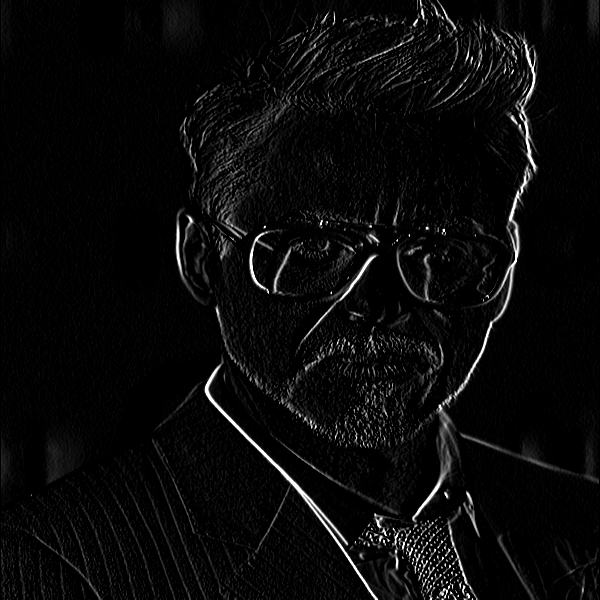

sobel y


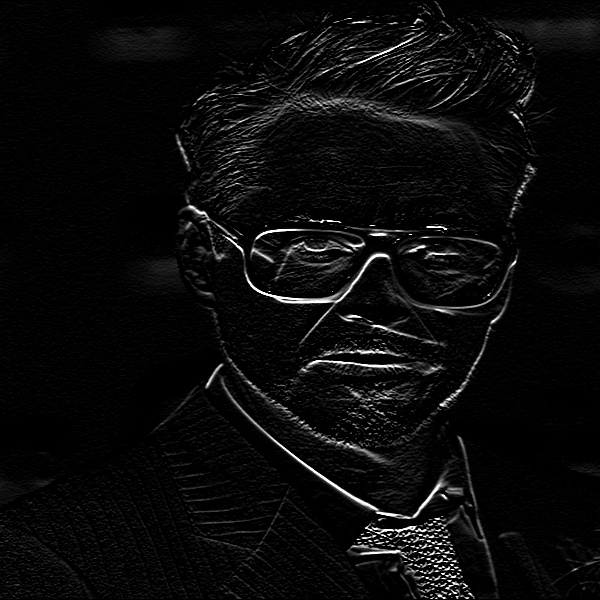

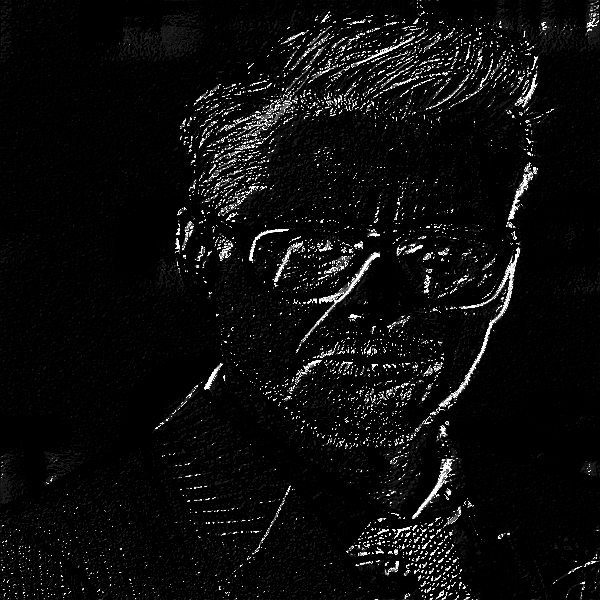

In [52]:
sobelx=cv2.Sobel(gray, cv2.CV_64F, 1, 0)
sobely=cv2.Sobel(gray, cv2.CV_64F, 0, 1)
combine_sobel=cv2.bitwise_or(sobelx, sobely)
print("sobel x")
cv2_imshow(sobelx)
print("sobel y")
cv2_imshow(sobely)

cv2_imshow(combine_sobel)

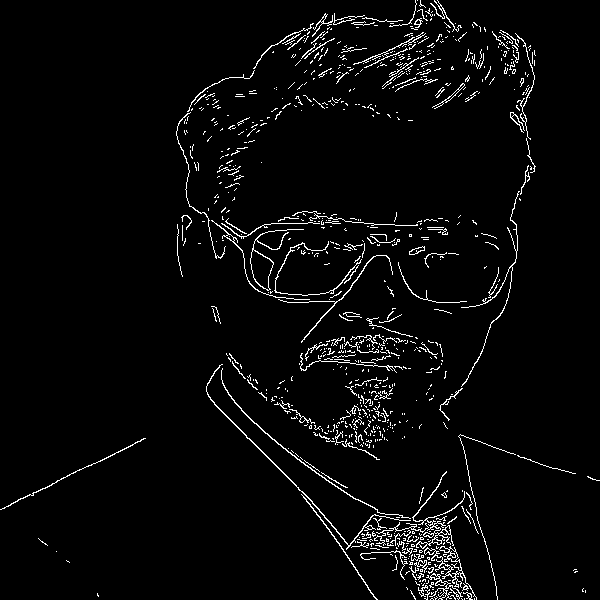

In [53]:
canny = cv2.Canny(gray, 150, 175)
cv2_imshow(canny)